red
blue


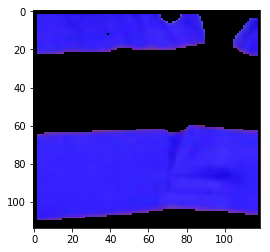

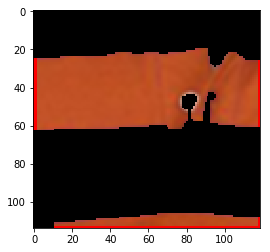

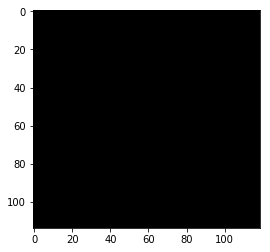

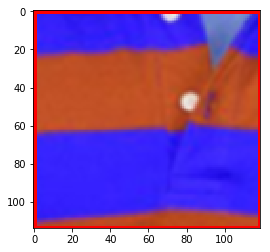

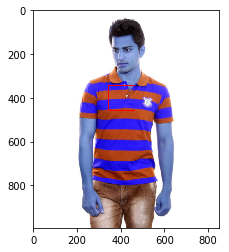

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
count=0
pixels = cv2.imread('red_blue.jpg')
frame = cv2.GaussianBlur(pixels,(5,5),0)

faces = face_cascade.detectMultiScale(pixels,1.3,5)
for (x,y,w,h) in faces:
    
    x1, y1 = x+w-15, y+(2*h)+32
    cv2.rectangle(frame,(x+15,y+h+67),(x1,y1),(255,0,0),2)
    roi = frame[y+h+67:y1, x+15:x1] # image .
     
    hsv= cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
    
    # RED..................
    l_red = np.array([161,155,84])
    u_red = np.array([179,255,255])
    red = cv2.inRange(hsv,l_red,u_red)

    #BLUE....................
    l_blue = np.array([38,86,0])
    u_blue = np.array([121,255,255])
    blue = cv2.inRange(hsv,l_blue,u_blue)

    
    #GREEN...................
    l_green = np.array([25,52,72])
    u_green = np.array([102,255,255])
    green = cv2.inRange(hsv,l_green,u_green)
    
#     #BLACK..................
#     l_black = np.array([0,0,0])
#     u_black = np.array([1,0,0])
#     red = cv2.inRange(hsv,l_black,u_black)
    
#     #WHITE..................
#     l_white = np.array([0,0,255])
#     u_white = np.array([10,10,255])
#     red = cv2.inRange(hsv,l_white,u_white)
    
    
    #morphological transformation, Dilation
    kernal = np.ones((5,5),"uint8")
    
    red = cv2.morphologyEx(red, cv2.MORPH_OPEN, kernal)
#     red = cv2.dilate(red,kernal)
    res1 = cv2.bitwise_and(roi,roi,mask=red)
    
    blue = cv2.morphologyEx(blue, cv2.MORPH_OPEN, kernal)
#     blue = cv2.dilate(blue,kernal)
    res2 = cv2.bitwise_and(roi,roi,mask=blue)
    
    green = cv2.morphologyEx(green, cv2.MORPH_OPEN, kernal)   
#     green = cv2.dilate(green,kernal)
    res3 = cv2.bitwise_and(roi,roi,mask=green)
    


    # tracking the "RED" color:-
    (contours1,hierarchy1) = cv2.findContours(red,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for (pic, contour) in enumerate(contours1):
        area = cv2.contourArea(contour)
        if(area>300):
            a,b,c,d = cv2.boundingRect(contour)
#             img = cv2.rectangle(roi,(a,b),(a+c,b+d),(0,255,0),2)
#             cv2.putText(img,"RED_color",(a,b),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255))
            color_name="red"
            count+=1
    if count>1:
        print(color_name)
        count=0
        
    # tracking the "GREEN" color:-
    (contours3,hierarchy3) = cv2.findContours(green,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours3):
        area = cv2.contourArea(contour)
        if(area>300):
            a,b,c,d = cv2.boundingRect(contour)
#             img = cv2.rectangle(roi,(a,b),(a+c,b+d),(0,255,0),2)
#             cv2.putText(img,"YELLOW_color",(a,b),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255))
            color_name="green"
            count+=1
    if count>1:
        print(color_name)
        count=0
        
    
    # tracking the "BLUE" color:-
    (contours2,hierarchy2) = cv2.findContours(blue,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours2):
        area = cv2.contourArea(contour)
        if(area>300):
            a,b,c,d = cv2.boundingRect(contour)
#             img = cv2.rectangle(roi,(a,b),(a+c,b+d),(0,255,0),2)
#             cv2.putText(img,"BLUE_color",(a,b),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255))
            color_name="blue"
            count+=1
    if count>1:
        print(color_name)
        count=0
    

        
#     # tracking the "BLACK" color:-
#     (contours3,hierarchy3) = cv2.findContours(black,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     for pic, contour in enumerate(contours3):
#         area = cv2.contourArea(contour)
#         if(area>300):
#             a,b,c,d = cv2.boundingRect(contour)
# #             img = cv2.rectangle(roi,(a,b),(a+c,b+d),(0,255,0),2)
# #             cv2.putText(img,"YELLOW_color",(a,b),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255))
#             color_name="black"
#             print(color_name)
        
#     # tracking the "WHITE" color:-
#     (contours3,hierarchy3) = cv2.findContours(white,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     for pic, contour in enumerate(contours3):
#         area = cv2.contourArea(contour)
#         if(area>300):
#             a,b,c,d = cv2.boundingRect(contour)
# #             img = cv2.rectangle(roi,(a,b),(a+c,b+d),(0,255,0),2)
# #             cv2.putText(img,"YELLOW_color",(a,b),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255))
#             color_name="white"
#             print(color_name)
        
        
        

plt.imshow(res1) # red mask colored
plt.show()
plt.imshow(res2) # blue mask colored
plt.show()
plt.imshow(res3) # green mask colored
plt.show()
plt.imshow(roi)
plt.show()
plt.imshow(frame)
plt.show()